# COFFEE SHOP SALES ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

### Import Raw Data 

In [2]:
df = pd.read_csv("CoffeeShopSales.csv");

### MetaData of Raw Data

In [3]:
df.head(5)

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,product_category,product_type,product_detail,Day Name,total_price,quantity,unit_price
0,1,16-04-2023,07:06:11,5,Lower Manhattan,32,Coffee,Gourmet brewed coffee,Ethiopia Rg,Sunday,6.0,2,3.0
1,2,14-03-2023,07:08:56,5,Lower Manhattan,57,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Tuesday,9.3,3,3.1
2,3,03-01-2023,07:14:04,5,Lower Manhattan,59,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,Tuesday,18.0,4,4.5
3,4,09-09-2023,07:20:24,5,Lower Manhattan,22,Coffee,Drip coffee,Our Old Time Diner Blend Sm,Saturday,10.0,5,2.0
4,5,08-09-2023,07:22:41,5,Lower Manhattan,57,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Friday,18.6,6,3.1


In [4]:
df.tail(5)

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,product_category,product_type,product_detail,Day Name,total_price,quantity,unit_price
533,534,02-06-2023,19:30:55,3,Astoria,51,Tea,Brewed Black tea,Earl Grey Lg,Friday,15.00,5,3.00
534,535,02-04-2023,19:34:03,8,Hell's Kitchen,43,Tea,Brewed herbal tea,Lemon Grass Lg,Sunday,18.00,6,3.00
535,536,05-06-2023,19:34:39,8,Hell's Kitchen,61,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Lg,Monday,33.25,7,4.75
536,537,02-09-2023,19:34:48,3,Astoria,40,Coffee,Barista Espresso,Cappuccino,Saturday,30.00,8,3.75
537,538,15-02-2023,19:35:55,8,Hell's Kitchen,27,Coffee,Or,NaN,Wednesday,31.50,9,3.50


In [5]:
print("The Metadta of the dataset: ", df.shape)

The Metadta of the dataset:  (538, 13)


In [6]:
print("The Rows of the dataset: ", df.shape[0])

The Rows of the dataset:  538


In [7]:
print("The Columns of the dataset: ", df.shape[1])

The Columns of the dataset:  13


In [8]:
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time', 'store_id',
       'store_location', 'product_id', 'product_category', 'product_type',
       'product_detail', 'Day Name', 'total_price', 'quantity', 'unit_price'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    538 non-null    int64  
 1   transaction_date  538 non-null    object 
 2   transaction_time  538 non-null    object 
 3   store_id          538 non-null    int64  
 4   store_location    538 non-null    object 
 5   product_id        538 non-null    int64  
 6   product_category  538 non-null    object 
 7   product_type      538 non-null    object 
 8   product_detail    537 non-null    object 
 9   Day Name          538 non-null    object 
 10  total_price       538 non-null    float64
 11  quantity          538 non-null    int64  
 12  unit_price        538 non-null    float64
dtypes: float64(2), int64(4), object(7)
memory usage: 54.8+ KB


### Data Types in Raw Data

In [10]:
df.dtypes

transaction_id        int64
transaction_date     object
transaction_time     object
store_id              int64
store_location       object
product_id            int64
product_category     object
product_type         object
product_detail       object
Day Name             object
total_price         float64
quantity              int64
unit_price          float64
dtype: object

In [11]:
df.describe()

,transaction_id,store_id,product_id,total_price,quantity,unit_price
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000
mean,269.500000,5.336431,46.224907,17.275000,5.500000,3.140706
std,155.451493,2.065999,15.849254,9.902529,2.867171,0.659070
min,1.000000,3.000000,22.000000,2.000000,1.000000,2.000000
25%,135.250000,3.000000,34.000000,9.000000,3.000000,2.500000
50%,269.500000,5.000000,44.500000,16.625000,5.500000,3.000000
75%,403.750000,8.000000,56.000000,24.000000,8.000000,3.750000
max,538.000000,8.000000,87.000000,47.500000,10.000000,4.750000


### KPI'S

In [12]:
total_revenue = df['total_price'].sum()
total_coffee_sold = df['quantity'].sum()
total_orders = df['transaction_id'].nunique()
avg_order_value = total_revenue / total_orders
avg_coffee_per_order = total_coffee_sold / total_orders

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Coffee Sold: {total_coffee_sold:,}")
print(f"Total Orders: {total_orders:,}")
print(f"Avg Order Value: ${avg_order_value:,.2f}")
print(f"Average Coffee per Order: {avg_coffee_per_order:.2f}")

Total Revenue: $9,293.95
Total Coffee Sold: 2,959
Total Orders: 538
Avg Order Value: $17.28
Average Coffee per Order: 5.50


### CHART'S

In [13]:
product_detail_analysis = (
    df.groupby('product_detail')['transaction_id']
      .nunique()
      .sort_values(ascending=False)
      .reset_index(name='total_orders')
)

product_detail_analysis.head(10)


,product_detail,total_orders
0,Sustainably Grown Organic Rg,17
1,Latte,17
2,Jamaican Coffee River Lg,16
3,Morning Sunrise Chai Rg,16
4,Cappuccino,15
5,Our Old Time Diner Blend Rg,15
6,Lemon Grass Lg,15
7,Our Old Time Diner Blend Lg,14
8,Spicy Eye Opener Chai Rg,14
9,Jamaican Coffee River Rg,13


##### Daily Trend - Total Orders

C:\Users\jaina\AppData\Local\Temp\ipykernel_23376\2812303701.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders_by_day = df.groupby('day_name')['transaction_id'].nunique()


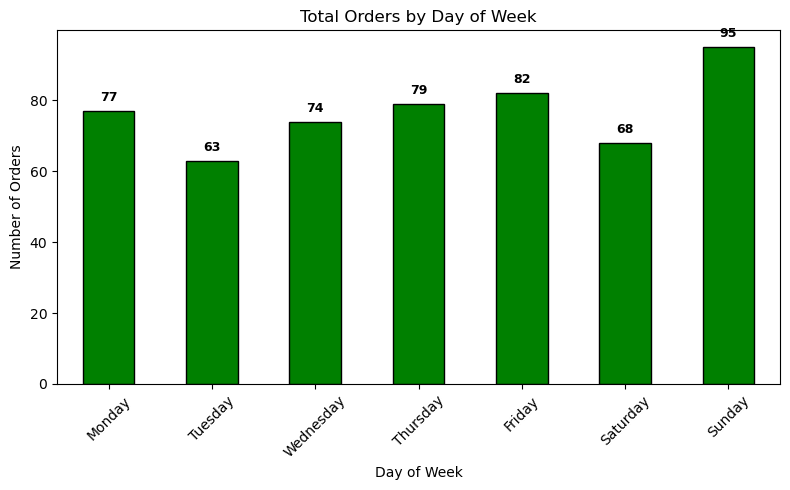

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df['transaction_date'] = pd.to_datetime(df['transaction_date'], dayfirst=True)
df['day_name'] = df['transaction_date'].dt.day_name()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df['day_name'] = pd.Categorical(df['day_name'], categories=weekday_order, ordered=True)

orders_by_day = df.groupby('day_name')['transaction_id'].nunique()

ax = orders_by_day.plot(
    kind='bar',
    figsize=(8, 5),
    color='green',
    edgecolor='black'
)

plt.title("Total Orders by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)

for i, val in enumerate(orders_by_day):
    plt.text(i, val + 2, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


##### Daily Trend - Total Revenue

C:\Users\jaina\AppData\Local\Temp\ipykernel_23376\1415055044.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_day = df.groupby('day_name')['total_price'].sum()


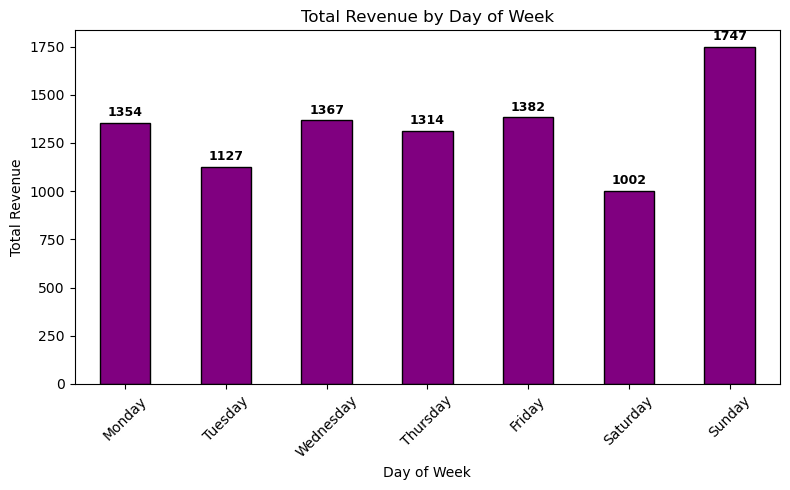

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df['transaction_date'] = pd.to_datetime(df['transaction_date'], dayfirst=True)
df['day_name'] = df['transaction_date'].dt.day_name()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df['day_name'] = pd.Categorical(df['day_name'], categories=weekday_order, ordered=True)

revenue_by_day = df.groupby('day_name')['total_price'].sum()

ax = revenue_by_day.plot(
    kind='bar',
    figsize=(8, 5),
    color='purple',
    edgecolor='black'
)

plt.title("Total Revenue by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

for i, val in enumerate(revenue_by_day):
    plt.text(i, val + 20, f"{val:.0f}", ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


##### Hourly Trend - Total Orders

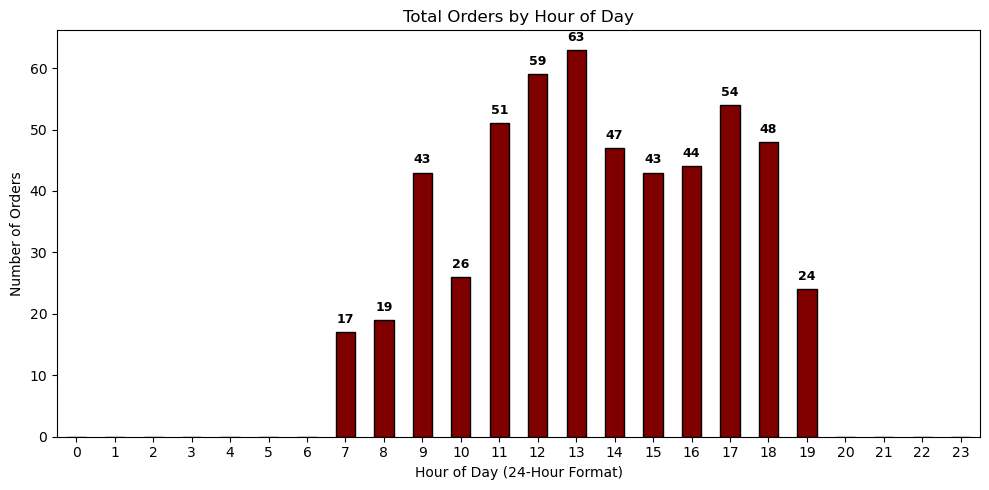

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S')
df['order_hour'] = df['transaction_time'].dt.hour

orders_by_hour = (
    df.groupby('order_hour')['transaction_id']
      .nunique()
      .reindex(range(24), fill_value=0)
)

ax = orders_by_hour.plot(
    kind='bar',
    figsize=(10,5),
    color='maroon',
    edgecolor='black'
)

plt.title("Total Orders by Hour of Day")
plt.xlabel("Hour of Day (24-Hour Format)")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)

for i, val in enumerate(orders_by_hour):
    if val > 0:
        plt.text(i, val + 1, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


##### Monthly Trend - Total Orders

C:\Users\jaina\AppData\Local\Temp\ipykernel_23376\3259850098.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders_by_month = df.groupby('month_name')['transaction_id'].nunique()


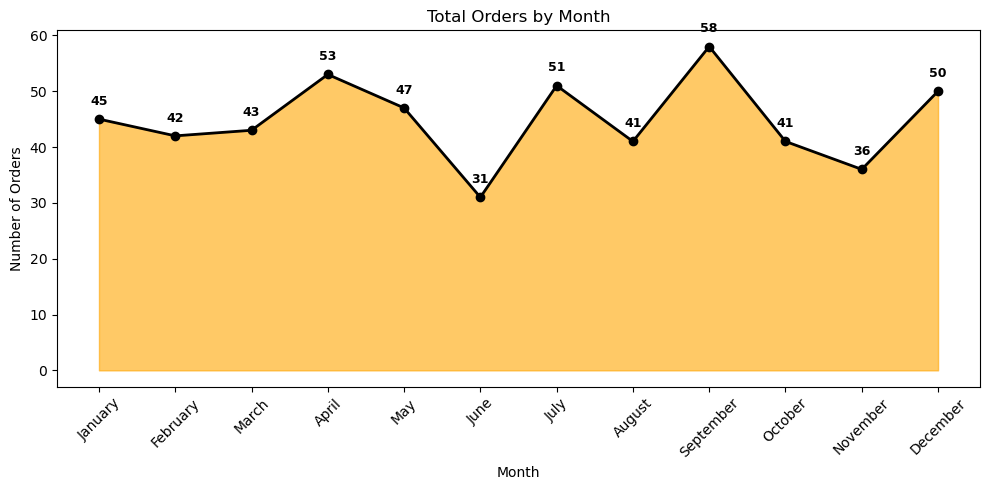

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df['transaction_date'] = pd.to_datetime(df['transaction_date'], dayfirst=True)
df['month_name'] = df['transaction_date'].dt.month_name()

month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

orders_by_month = df.groupby('month_name')['transaction_id'].nunique()

plt.figure(figsize=(10,5))
plt.fill_between(orders_by_month.index, orders_by_month.values, color='orange', alpha=0.6)
plt.plot(orders_by_month.index, orders_by_month.values, color='black', linewidth=2, marker='o')

plt.title("Total Orders by Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)

for i, val in enumerate(orders_by_month):
    plt.text(i, val + 2, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


##### % of Sales by Category

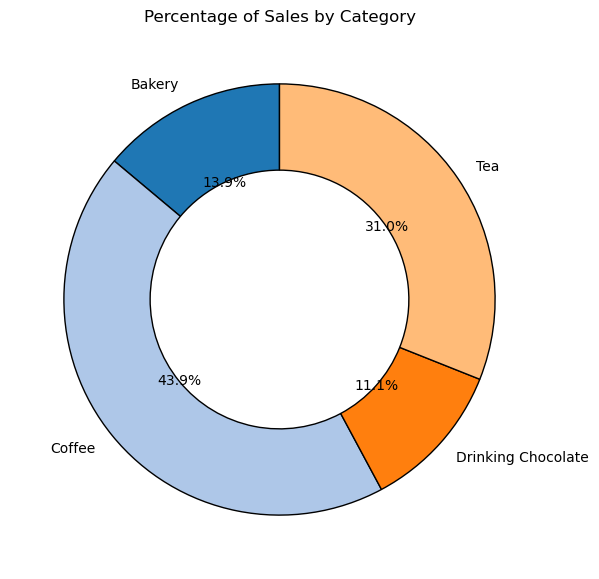

In [18]:
import matplotlib.pyplot as plt

category_sales = df.groupby('product_category')['total_price'].sum()
category_pct = category_sales / category_sales.sum() * 100

plt.figure(figsize=(7,7))
colors = plt.get_cmap('tab20').colors

plt.pie(
    category_pct,
    labels=category_pct.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'width': 0.4}
)

plt.title("Percentage of Sales by Category")
plt.show()


##### % of Sales by Category & Product Type

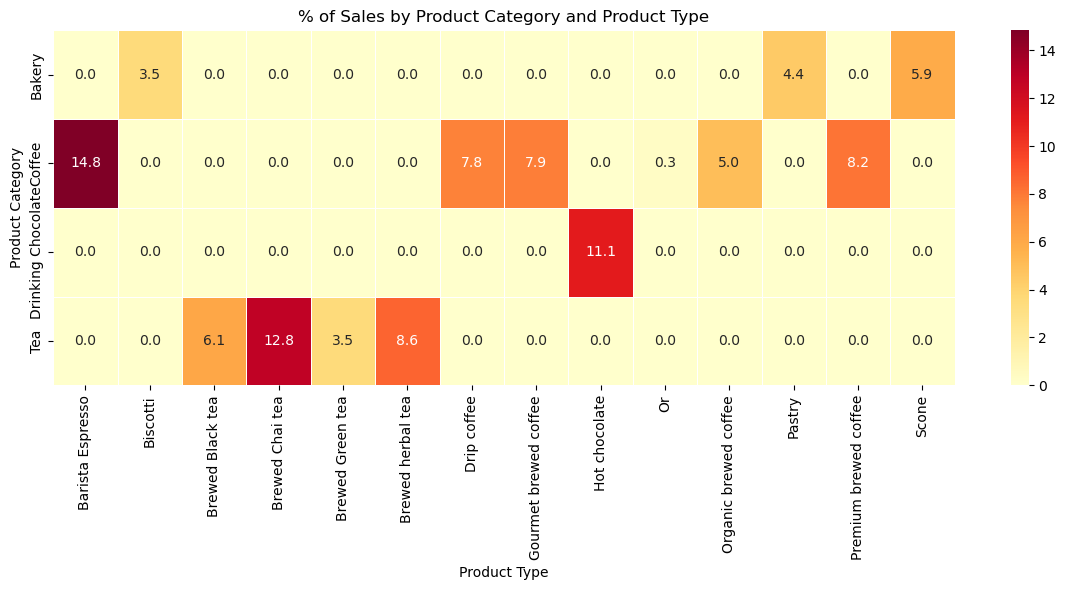

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sales_pivot = df.pivot_table(
    index='product_category',
    columns='product_type',
    values='total_price',
    aggfunc='sum',
    fill_value=0
)

sales_pct = sales_pivot / sales_pivot.sum().sum() * 100

plt.figure(figsize=(12,6))
sns.heatmap(
    sales_pct,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",
    linewidths=0.5
)

plt.title("% of Sales by Product Category and Product Type")
plt.ylabel("Product Category")
plt.xlabel("Product Type")
plt.tight_layout()
plt.show()


##### Total Coffee Sold by Product Category


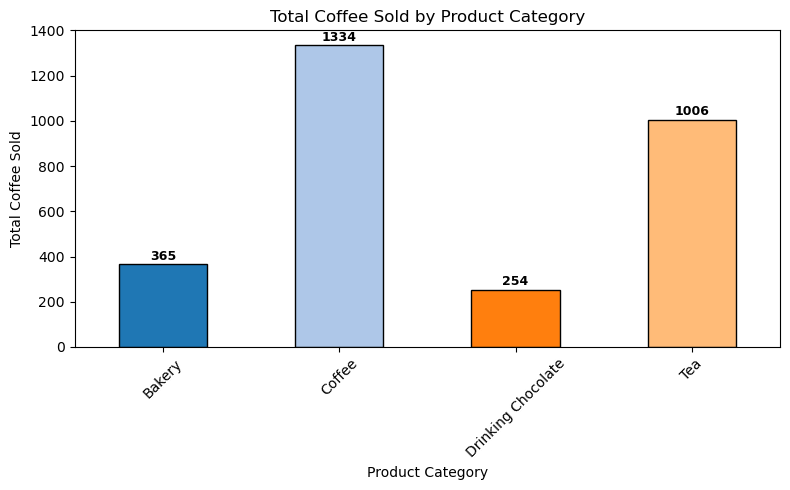

In [20]:
import matplotlib.pyplot as plt

coffee_by_category = df.groupby('product_category')['quantity'].sum()

colors = list(plt.get_cmap('tab20').colors)
colors = colors[:len(coffee_by_category)]

ax = coffee_by_category.plot(
    kind='bar',
    figsize=(8,5),
    color=colors,
    edgecolor='black'
)

plt.title("Total Coffee Sold by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Coffee Sold")
plt.xticks(rotation=45)

for i, val in enumerate(coffee_by_category):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


##### Top 5 Best-Selling – Total Quantity

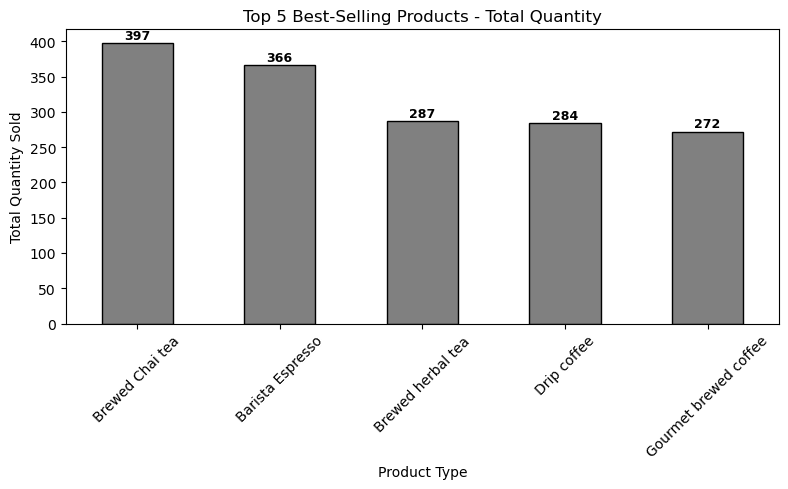

In [21]:
import matplotlib.pyplot as plt

coffee_by_product = df.groupby('product_type')['quantity'].sum()

top5 = coffee_by_product.sort_values(ascending=False).head(5)

ax = top5.plot(
    kind='bar',
    figsize=(8,5),
    color='grey',
    edgecolor='black'
)

plt.title("Top 5 Best-Selling Products - Total Quantity")
plt.xlabel("Product Type")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)

for i, val in enumerate(top5):
    plt.text(i, val + 2, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


##### Top 5 Best-Selling – Total Orders

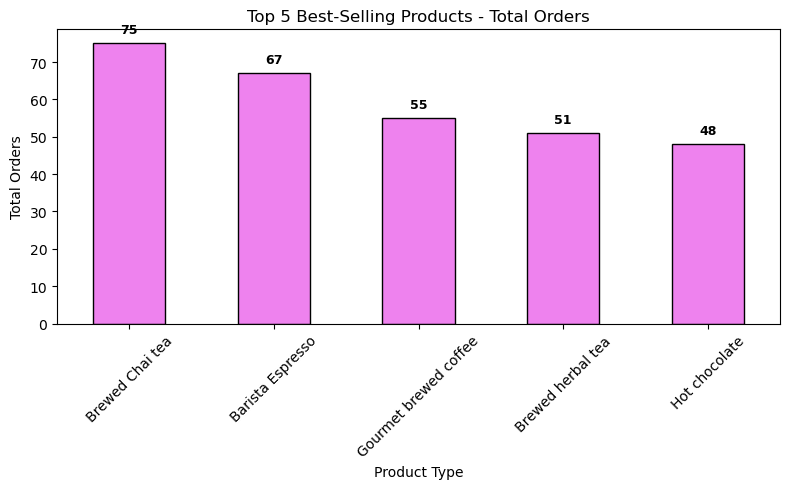

In [22]:
import matplotlib.pyplot as plt

orders_by_product = df.groupby('product_type')['transaction_id'].nunique()

top5 = orders_by_product.sort_values(ascending=False).head(5)

ax = top5.plot(
    kind='bar',
    figsize=(8,5),
    color='violet',
    edgecolor='black'
)

plt.title("Top 5 Best-Selling Products - Total Orders")
plt.xlabel("Product Type")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)

for i, val in enumerate(top5):
    plt.text(i, val + 2, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


#### Top 5 Best-Selling – Total Revenue

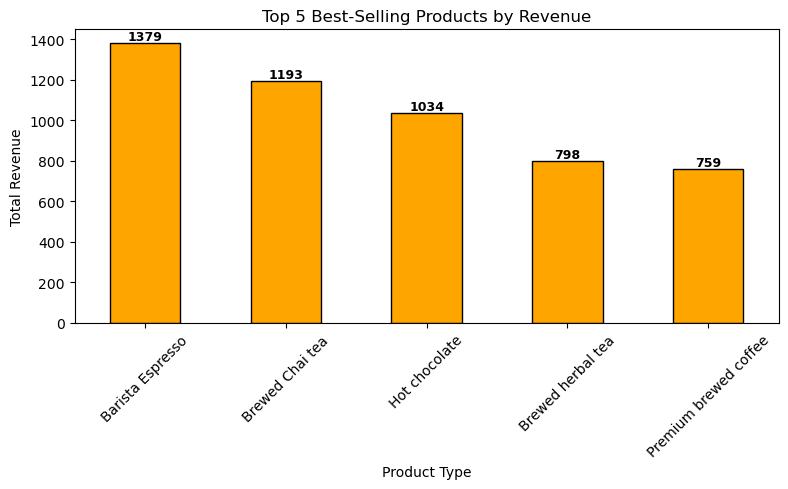

In [23]:
import matplotlib.pyplot as plt

sales_by_product = df.groupby('product_type')['total_price'].sum()

top5 = sales_by_product.sort_values(ascending=False).head(5)

ax = top5.plot(
    kind='bar',
    figsize=(8,5),
    color='orange',
    edgecolor='black'
)

plt.title("Top 5 Best-Selling Products by Revenue")
plt.xlabel("Product Type")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

for i, val in enumerate(top5):
    plt.text(i, val + 2, f"{val:.0f}", ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


##### Bottom 5 Least-Selling Products -  Total Quantity

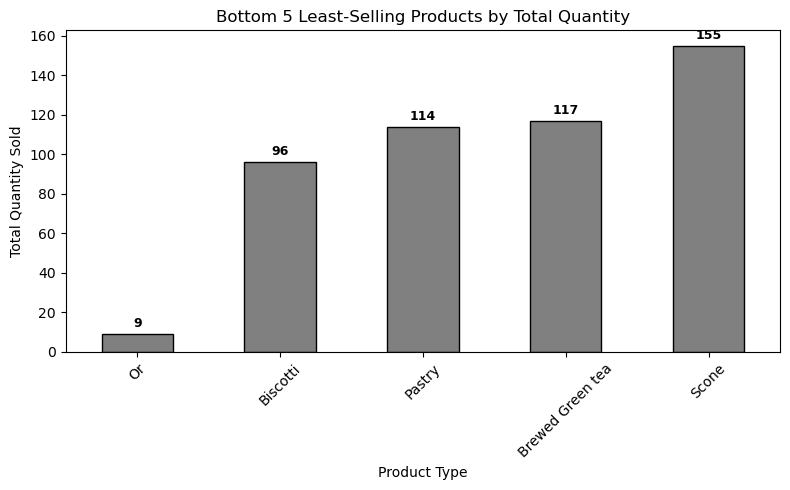

In [24]:
import matplotlib.pyplot as plt

quantity_by_product = df.groupby('product_type')['quantity'].sum()
bottom5_qty = quantity_by_product.sort_values(ascending=True).head(5)

ax = bottom5_qty.plot(
    kind='bar',
    figsize=(8,5),
    color='grey',
    edgecolor='black'
)

plt.title("Bottom 5 Least-Selling Products by Total Quantity")
plt.xlabel("Product Type")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)

for i, val in enumerate(bottom5_qty):
    plt.text(i, val + 2, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


##### Bottom 5 Least-Selling Products - Total Orders

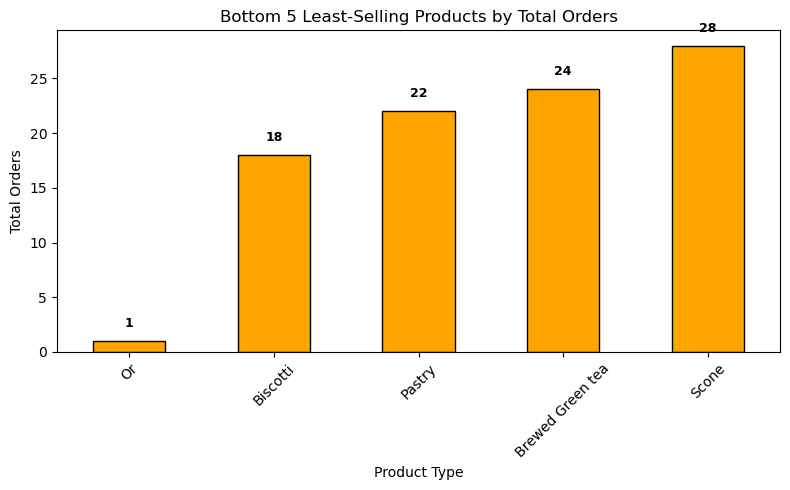

In [25]:
import matplotlib.pyplot as plt

orders_by_product = df.groupby('product_type')['transaction_id'].nunique()
bottom5_orders = orders_by_product.sort_values(ascending=True).head(5)

ax = bottom5_orders.plot(
    kind='bar',
    figsize=(8,5),
    color='orange',
    edgecolor='black'
)

plt.title("Bottom 5 Least-Selling Products by Total Orders")
plt.xlabel("Product Type")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)

for i, val in enumerate(bottom5_orders):
    plt.text(i, val + 1, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


##### Bottom 5 Best-Selling – Total Revenue


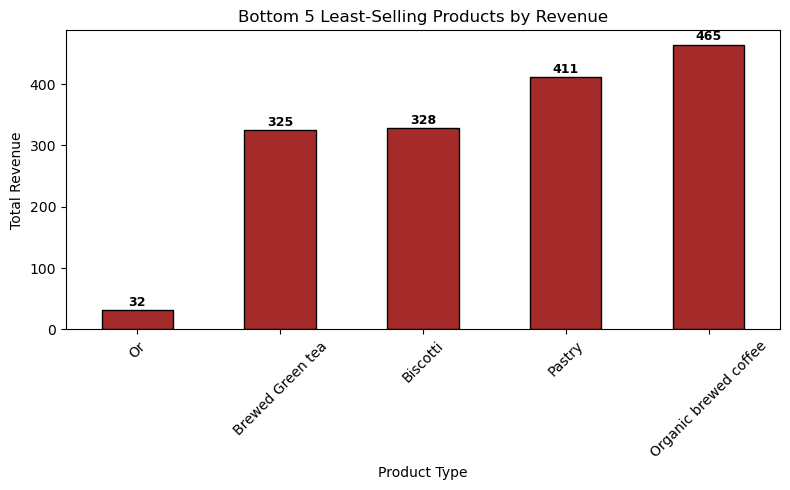

In [26]:
import matplotlib.pyplot as plt

sales_by_product = df.groupby('product_type')['total_price'].sum()

bottom5 = sales_by_product.sort_values(ascending=True).head(5)

ax = bottom5.plot(
    kind='bar',
    figsize=(8,5),
    color='brown',
    edgecolor='black'
)

plt.title("Bottom 5 Least-Selling Products by Revenue")
plt.xlabel("Product Type")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

for i, val in enumerate(bottom5):
    plt.text(i, val + 2, f"{val:.0f}", ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()
